# Studi Kasus : Analisis Data Eksploratif


## Tujuan

Peserta dapat melakukan analisis data ekploartif menggunakan modul `pandas`, `numpy` dan `matplotlib`

## Skenario

Kamu  merupakan seorang data analis yang sangat berpengalaman. Pada suatu hari kamu diminta untuk melakukan analisis terhadap data yang dimiliki oleh sebuah toko. Sebelum analisis yang lebih kompleks kamu lakukan, kamu perlu melakukan analisis data eksploratif. Pada analisis data eksploratif kamu akan melihat terlebih dahulu data seperti apa yang akan anda analisa. Kegiatan ini meliputi:

* Analisis statistika deskriptif
* Analisis missing value
* Visualisasi data untuk mengecek bentuk distribusi variabel dan adanya korelasi antar variabel

Pada latihan kali ini kamu hanya diminta untuk melengkapi kode yang telah disediakan dengan mengganti `___` dengan kata kunci atau sebuah fungsi agar program dapat berjalan.

In [12]:
# import modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data yang DIgunakan

Data yang digunakan memiliki format `csv`. Data ini dapat diperoleh [disini](https://github.com/kadnan/EDA_Python/blob/master/data.csv). Untuk membancanya kita dapat menggunakan sebuah fungsi yang dimiliki oleh `pandas`.

In [21]:
df = pd.read_csv("data.csv")
df

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,$54.00
1,MyStore,1,3,2,1,10,Cash,7,-$17.80
2,MyStore,1,3,2,1,10,Card,7,$41.99
3,MyStore,1,3,2,1,11,Card,20,$412.50
4,MyStore,1,3,2,1,12,Cash,1,-$18.00
...,...,...,...,...,...,...,...,...,...
4095,MyStore,53,1,31,12,13,Card,10,$129.00
4096,MyStore,53,1,31,12,14,Cash,32,-$68.36
4097,MyStore,53,1,31,12,14,Card,5,$71.00
4098,MyStore,53,1,31,12,15,Cash,66,-$359.18


In [24]:
# konversi format variabel Amount menjadi numeric
df["Amount"] = df["Amount"].str.replace("$","").str.replace(",","")
df["Amount"] = pd.to_numeric(df["Amount"])

Berdasarkan data yang ditampilkan dapat dilihat bahwa data hanya berasal dari satu toko saja, sehingga variabel `BranchName` dapat dihilangkan dari data yang ada.

In [25]:
df.drop('BranchName', axis = 1, inplace = True)
df

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00
...,...,...,...,...,...,...,...,...
4095,53,1,31,12,13,Card,10,129.00
4096,53,1,31,12,14,Cash,32,-68.36
4097,53,1,31,12,14,Card,5,71.00
4098,53,1,31,12,15,Cash,66,-359.18


## Analisis Statistika Deskriptif

Metode berikut dapat digunakan untuk menghasilkan ringkasan data

In [26]:
df.describe()

,Week,DayWeek,Day,Month,Hour,Units,Amount
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,34.017805,4.183902,15.812195,8.231463,12.949024,12.779512,35.237046
std,14.714289,1.967864,8.810817,3.396586,2.631853,17.854968,183.538724
min,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,-1041.800000
25%,29.000000,3.000000,8.000000,7.000000,11.000000,3.000000,-47.000000
50%,37.000000,4.000000,16.000000,9.000000,13.000000,8.000000,-2.385000
75%,45.000000,6.000000,23.000000,11.000000,15.000000,16.000000,99.512500
max,53.000000,7.000000,31.000000,12.000000,19.000000,274.000000,1487.000000


Berdasarkan data tersebut, seluruh variabel memiliki nilai `count` yang sama yang menunjukkan pada data tidak terdapat *missing value*

## Distribusi Data

Analisis distribusi data dapat dilakukan melalui visualisasi data menggunakan boxplot atau histrogram

### Histogram

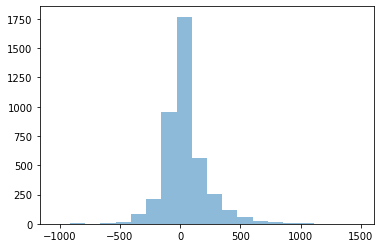

In [34]:
# Histogram Amount
num_bins = 20
plt.hist(df["Amount"], num_bins , alpha = 0.5)
plt.show()

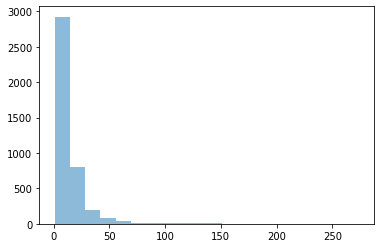

In [37]:
# Histogram Units
num_bins = 20
plt.hist(df["Units"], num_bins , alpha = 0.5)
plt.show()

### Boxplot

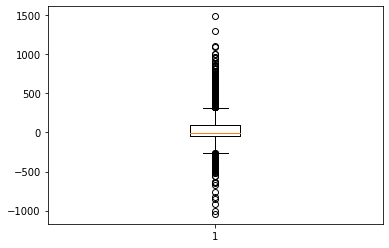

In [40]:
# Boxplot Amount
plt.boxplot(df["Amount"])
plt.show()

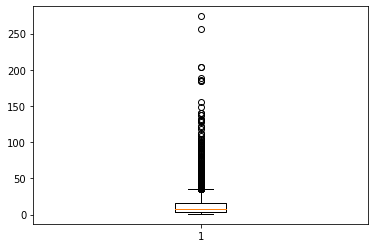

In [41]:
# Boxplot Units
plt.boxplot(df["Units"])
plt.show()

## Analisis Penjualan
 
Analisis jumlah penjulan dilakukan dengan mengelompokkan data units berdasarkan jam, hari, minggu, atau bulan untuk mengetahui kapan penjualan tertinggi terjadi.

### Penjulan Per Bulan

In [42]:
penjualan_per_bulan = df.groupby("Month").size()
penjualan_per_bulan

Month
1     604
7     606
8     572
9     580
10    581
11    587
12    570
dtype: int64

Text(0, 0.5, 'Total Unit Terjual')

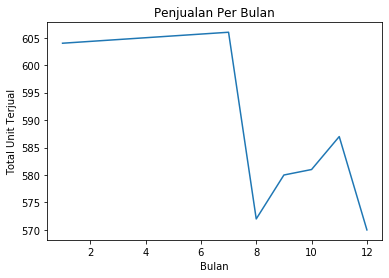

In [46]:
plot = penjualan_per_bulan.plot(title = "Penjualan Per Bulan")
plot.set_xlabel("Bulan")
plot.set_ylabel("Total Unit Terjual")

### Penjualan Per Hari

In [47]:
penjualan_per_hari = df.groupby("Day").size()
penjualan_per_hari

Day
1     121
2     144
3     133
4     137
5     133
6     138
7     123
8     118
9     137
10    137
11    140
12    141
13    138
14    139
15    141
16    133
17    122
18    151
19    137
20    130
21    136
22    133
23    145
24    124
25    112
26    123
27    135
28    138
29    145
30    138
31     78
dtype: int64

Text(0, 0.5, 'Total Unit Terjual')

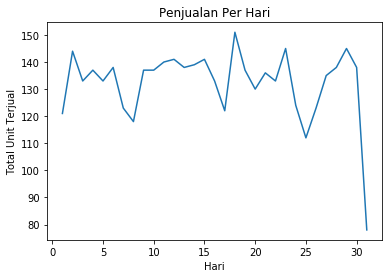

In [48]:
plot = penjualan_per_hari.plot(title = "Penjualan Per Hari")
plot.set_xlabel("Hari")
plot.set_ylabel("Total Unit Terjual")